### Assignment 3 Prediction of Music 


In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:

import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("song_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102627 entries, 0 to 102626
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user         102627 non-null  object
 1   song         102627 non-null  object
 2   play_count   102627 non-null  int64 
 3   title        102627 non-null  object
 4   release      102627 non-null  object
 5   artist_name  102627 non-null  object
 6   year         102627 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.5+ MB


In [4]:
data.describe()

,play_count,year
count,102627.000000,102627.000000
mean,2.885790,1624.812389
std,8.569376,781.595402
min,1.000000,0.000000
25%,1.000000,1984.000000
50%,1.000000,2002.000000
75%,3.000000,2007.000000
max,1890.000000,2010.000000


In [5]:
data.head()

,user,song,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0


In [6]:
data.isnull().sum()


data.dropna(inplace=True)


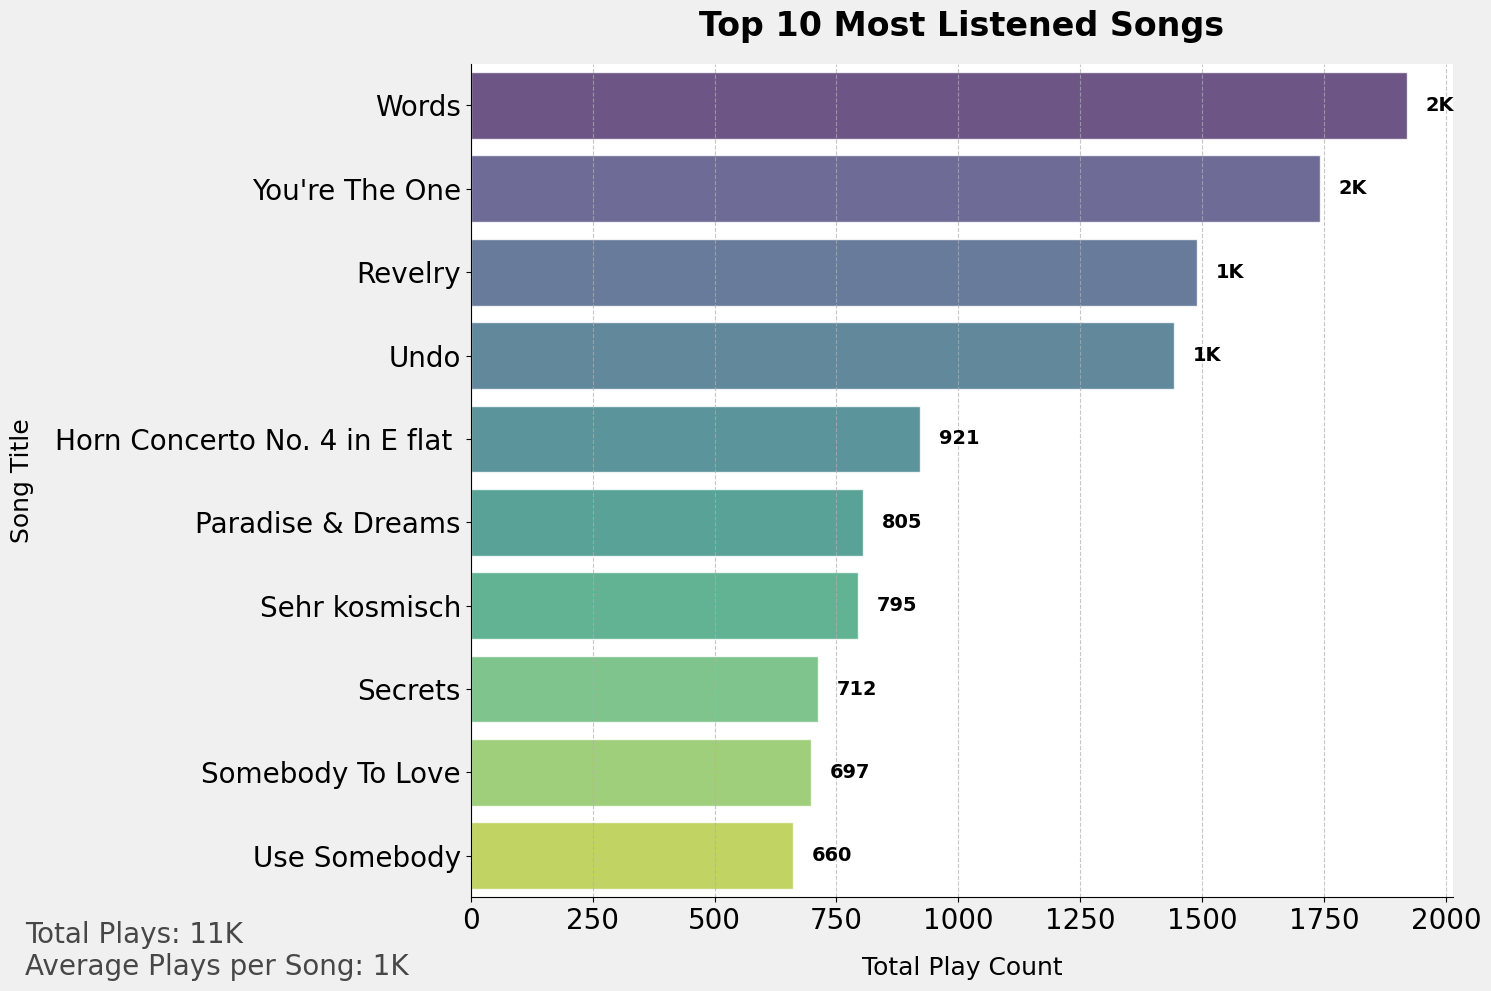

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set_palette("husl")


most_listened_songs = data.groupby('title')['play_count'].sum().sort_values(ascending=False).head(10)
most_listened_songs.index = most_listened_songs.index.str.slice(0, 30)


plt.figure(figsize=(15, 10))


bars = sns.barplot(
    x=most_listened_songs.values,
    y=most_listened_songs.index,
    palette="viridis", 
)


plt.title("Top 10 Most Listened Songs", fontsize=24, fontweight='bold', pad=20)
plt.xlabel("Total Play Count", fontsize=18, labelpad=15)
plt.ylabel("Song Title", fontsize=18, labelpad=15)


plt.grid(True, axis='x', linestyle='--', alpha=0.7)
sns.despine()


for i, v in enumerate(most_listened_songs.values):
    if v >= 1_000_000:
        value_text = f'{v/1_000_000:.1f}M'
    elif v >= 1_000:
        value_text = f'{v/1_000:.0f}K'
    else:
        value_text = f'{v:.0f}'
    
    plt.text(v + (max(most_listened_songs.values) * 0.02),
             i,
             value_text,
             va='center',
             fontsize=14,
             fontweight='bold')


plt.tick_params(axis='both', which='major', labelsize=20)

for bar in bars.patches:
    bar.set_alpha(0.8)
    bar.set_edgecolor('white')
    bar.set_linewidth(1)


plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('#f0f0f0')


total_plays = most_listened_songs.sum()
avg_plays = most_listened_songs.mean()
if total_plays >= 1_000_000:
    total_text = f'{total_plays/1_000_000:.1f}M'
else:
    total_text = f'{total_plays/1_000:.0f}K'
if avg_plays >= 1_000_000:
    avg_text = f'{avg_plays/1_000_000:.1f}M'
else:
    avg_text = f'{avg_plays/1_000:.0f}K'

plt.figtext(0.02, 0.02,
            f'Total Plays: {total_text}\n'
            f'Average Plays per Song: {avg_text}',
            fontsize=20,
            alpha=0.7)


plt.tight_layout()
plt.show()

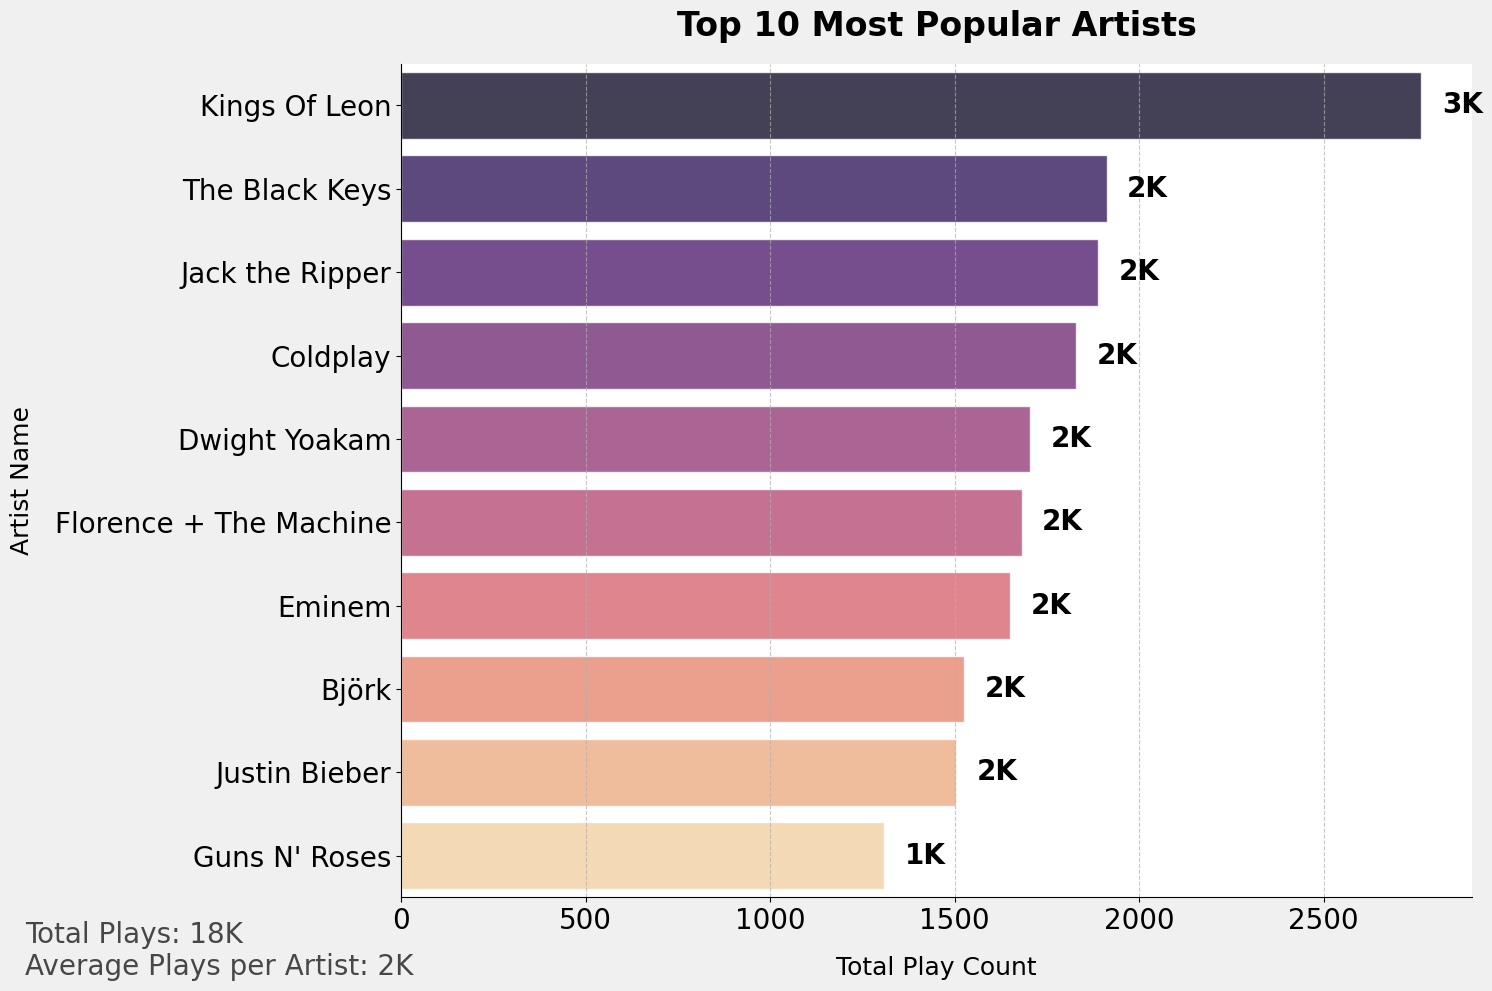

In [8]:



sns.set_palette("husl")

# group by artist name and play count
most_popular_artists = data.groupby('artist_name')['play_count'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(15, 10))


bars = sns.barplot(
    x=most_popular_artists.values,
    y=most_popular_artists.index,
    palette="magma"
)


plt.title("Top 10 Most Popular Artists", fontsize=24, fontweight='bold', pad=20)
plt.xlabel("Total Play Count", fontsize=18, labelpad=15)
plt.ylabel("Artist Name", fontsize=18, labelpad=15)

plt.grid(True, axis='x', linestyle='--', alpha=0.7)
sns.despine()

# Format and add value labels
for i, v in enumerate(most_popular_artists.values):
    if v >= 1_000_000:
        value_text = f'{v/1_000_000:.1f}M'
    elif v >= 1_000:
        value_text = f'{v/1_000:.0f}K'
    else:
        value_text = f'{v:.0f}'
    
    plt.text(v + (max(most_popular_artists.values) * 0.02),
             i,
             value_text,
             va='center',
             fontsize=20,
             fontweight='bold')


plt.tick_params(axis='both', which='major', labelsize=20)

# bar
for bar in bars.patches:
    bar.set_alpha(0.8)
    bar.set_edgecolor('white')
    bar.set_linewidth(1)

# background colour
plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('#f0f0f0')


total_plays = most_popular_artists.sum()
avg_plays = most_popular_artists.mean()
if total_plays >= 1_000_000:
    total_text = f'{total_plays/1_000_000:.1f}M'
else:
    total_text = f'{total_plays/1_000:.0f}K'
if avg_plays >= 1_000_000:
    avg_text = f'{avg_plays/1_000_000:.1f}M'
else:
    avg_text = f'{avg_plays/1_000:.0f}K'

plt.figtext(0.02, 0.02,
            f'Total Plays: {total_text}\n'
            f'Average Plays per Artist: {avg_text}',
            fontsize=20,
            alpha=0.7)


plt.tight_layout()

# Show plot
plt.show()

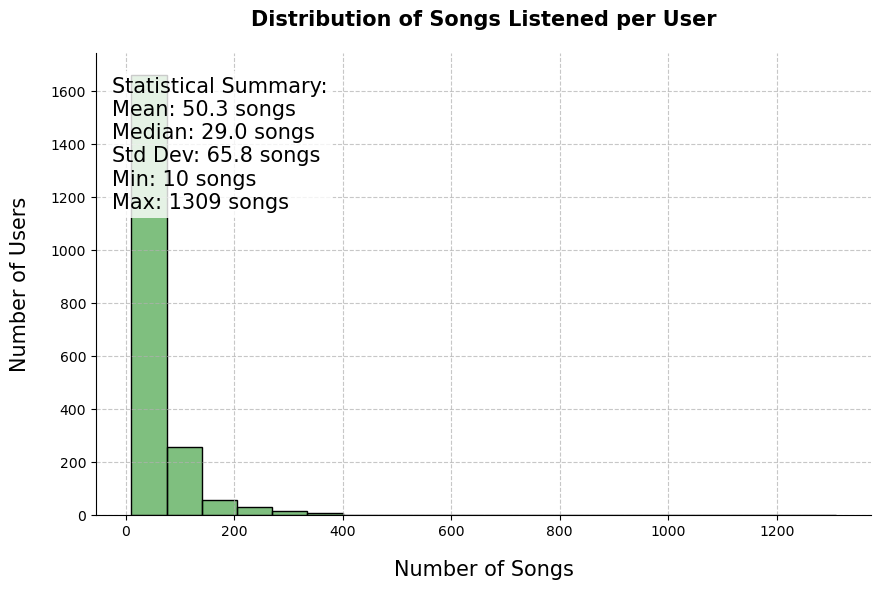

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set color palette
sns.set_palette("husl")


plt.figure(figsize=(10, 6))


user_song_counts = data.groupby('user')['title'].count()

ax = sns.histplot(
    data=user_song_counts,
    bins=20,
    color='green',
    alpha=0.5
)


plt.title("Distribution of Songs Listened per User", fontsize=15, fontweight='bold', pad=20) 
plt.xlabel("Number of Songs", fontsize=15, labelpad=15)  
plt.ylabel("Number of Users", fontsize=15, labelpad=15) 


plt.grid(True, linestyle='--', alpha=0.7)
sns.despine()

stats_text = f"""Statistical Summary:
Mean: {user_song_counts.mean():.1f} songs
Median: {user_song_counts.median():.1f} songs
Std Dev: {user_song_counts.std():.1f} songs
Min: {user_song_counts.min():.0f} songs
Max: {user_song_counts.max():.0f} songs"""

plt.text(0.02, 0.95, stats_text,
         transform=plt.gca().transAxes,
         fontsize=15, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
         verticalalignment='top')



plt.show()

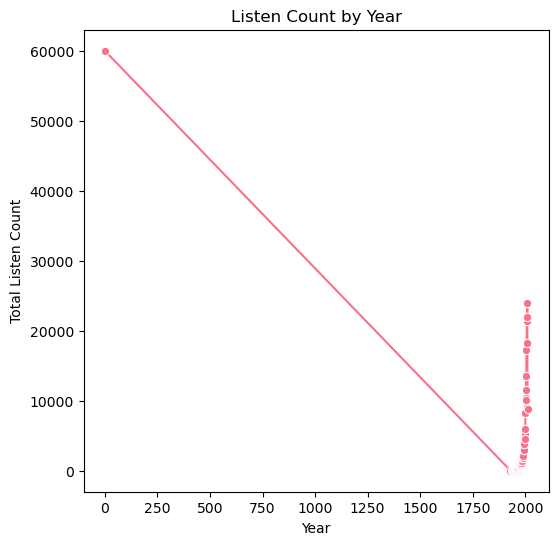

In [10]:
yearwise_listen_count = data.groupby('year').agg({'play_count': 'sum'}).reset_index()

plt.figure(figsize=(6, 6))
sns.lineplot(x='year', y='play_count', data=yearwise_listen_count, marker='o')
plt.title('Listen Count by Year')
plt.xlabel('Year')
plt.ylabel('Total Listen Count')
plt.show()


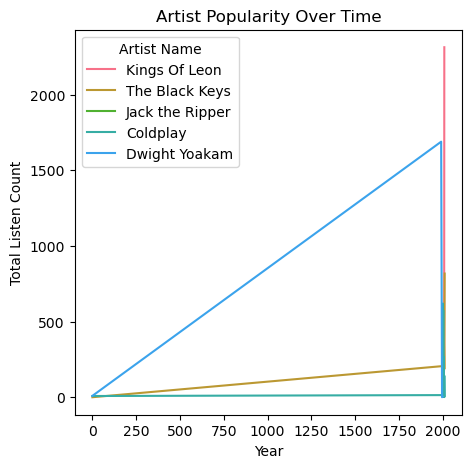

In [11]:

artist_year_popularity = data.groupby(['artist_name', 'year']).agg({'play_count': 'sum'}).reset_index()


top_artists_by_year = artist_year_popularity.groupby('artist_name').agg({'play_count': 'sum'}).sort_values(by='play_count', ascending=False).head(5)

plt.figure(figsize=(5, 5))
for artist in top_artists_by_year.index:
    artist_data = artist_year_popularity[artist_year_popularity['artist_name'] == artist]
    sns.lineplot(x='year', y='play_count', data=artist_data, label=artist)

plt.title('Artist Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Total Listen Count')
plt.legend(title='Artist Name')
plt.show()


            play_count      year
play_count    1.000000 -0.012986
year         -0.012986  1.000000


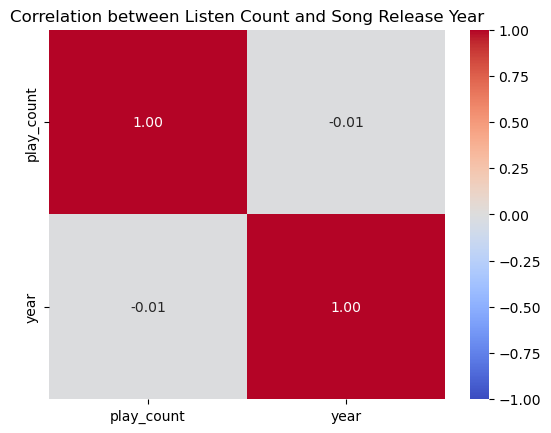

In [12]:

corr = data[['play_count', 'year']].corr()

print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation between Listen Count and Song Release Year')
plt.show()


#### Task 2 

### First of all we need to check which user ID has not listened to which song using our CSV file.

In [13]:
interaction_matrix = data.pivot_table(index='user', columns='song', values='play_count', aggfunc='sum', fill_value=0)

song_id = 'SOAAAGQ12A8C1420C8'
print(interaction_matrix[song_id])

user
0007c0e74728ca9ef0fe4eb7f75732e8026a278b    0
000ebc858861aca26bac9b49f650ed424cf882fc    0
00342a0cdf56a45465f09a39040a5bc25b7d0046    0
0039bd8483d578997718cdc0bf6c7c88b679f488    0
00498f4bab2bfeb17680113c7d9525ad5b0ad401    0
                                           ..
ffa24617ea80c268c74e86cd3ee3d9e7ac5504ec    0
ffadf9297a99945c0513cd87939d91d8b602936b    0
ffdaab327f2fc6b9fa01a4e3e7f41fdd0e468046    0
ffe50146303f1b12ea8254450b95580b1b99a5c4    0
fffce9c1537fbc350ea68823d956eaa8f5236dbe    0
Name: SOAAAGQ12A8C1420C8, Length: 2042, dtype: int64


In [14]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

interaction_matrix = data.pivot_table(index='user', columns='song', values='play_count', aggfunc='sum', fill_value=0)

def recommend_songs(user_id, top_n=10):
    if user_id not in interaction_matrix.index:
        return "User not found."
    
    target_user_vector = interaction_matrix.loc[user_id].values.reshape(1, -1)
    all_user_vectors = interaction_matrix.values
    user_similarity = cosine_similarity(target_user_vector, all_user_vectors)
    

    similar_users_indices = np.argsort(user_similarity[0])[::-1][1:top_n+1]
    similar_users = interaction_matrix.index[similar_users_indices]

    song_scores = {}
    for similar_user in similar_users:
        for song in interaction_matrix.columns:
            if interaction_matrix.loc[similar_user, song] > 0 and interaction_matrix.loc[user_id, song] == 0:
                song_scores[song] = song_scores.get(song, 0) + interaction_matrix.loc[similar_user, song]

    # Sort the songs by score
    recommended_songs = sorted(song_scores.items(), key=lambda x: x[1], reverse=True)

    return [song for song, score in recommended_songs]

user_id_to_recommend = 'b80344d063b5ccb3212f76538f3d9e43d87dca9e'
print(recommend_songs(user_id_to_recommend))


['SOXIHJJ12A8C144092', 'SOZCEGZ12A58A7EAD5', 'SOFLJQZ12A6D4FADA6', 'SORNMHI12A8C13C0B7', 'SOPFQXE12A8C13C72B', 'SOIIQPJ12B0B807AF4', 'SOPVJNI12A81C219B9', 'SOVTQLS12A6D4F8350', 'SODRLUT12A6D4FACDC', 'SOTIZXJ12A6D4FACD9', 'SOEYVHS12AB0181D31', 'SOGSAYQ12AB018BA14', 'SODCNEE12A6310E037', 'SOKEEKD12AB0188B39', 'SOUXIAM12AB018868C', 'SOKAMGX12A8C13AE29', 'SOTREDL12A8C13C6FA', 'SOPATZX12A8AE46295', 'SOTLEJN12A8C13E8EF', 'SOCBQKE12AB018548E', 'SODBQDT12A58A7C8C4', 'SODEAJC12A58A7769F', 'SOHIWSV12A67020042', 'SOIOESO12A6D4F621D', 'SOAUWYT12A81C206F1', 'SODDCSJ12A8C1423FA', 'SOGBXHR12AB018B411', 'SOLXNLK12A58A7ADCB', 'SOZLDXG12A58A7B133', 'SOVIZNF12AF72A710A', 'SODCXVC12A8C139446', 'SOHYUEB12AAF3B2909', 'SOHZPYD12AF72A12E2', 'SONOZVC12A8C146161', 'SOVUEJX12A6D4F79C4', 'SOOJCFV12A8C133FB3', 'SOISSYK12A6D4F78A8', 'SOTFGMT12AB0182B39', 'SOEQJBS12A8AE475A4', 'SOQQAAQ12A67ADE34D', 'SOAXQKY12AB018B414', 'SOQSPVZ12A8AE456CA', 'SOXPIDW12A6BD55B96', 'SOCXCTS12AC468A380', 'SOCYGSR12A58A7A6FE', 'SOFSTIV1

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import streamlit as st

# Load your data
data = pd.read_csv('song_dataset.csv')  # Replace with your actual dataset

# Preprocess data: create a user-song interaction matrix
interaction_matrix = data.pivot_table(index='user', columns='song', values='play_count', aggfunc='sum', fill_value=0)
scaler = MinMaxScaler()
interaction_matrix_scaled = pd.DataFrame(scaler.fit_transform(interaction_matrix), 
                                         index=interaction_matrix.index, 
                                         columns=interaction_matrix.columns)

# Compute cosine similarity between users
user_similarity = cosine_similarity(interaction_matrix_scaled)

def recommend_songs(user_id, n_recommendations=5):
    """
    Recommend songs to a user that they haven't listened to yet, based on user similarity.
    """
    if user_id not in interaction_matrix.index:
        return "User not found in the database"
    
    user_idx = list(interaction_matrix.index).index(user_id)
    similar_users = np.argsort(user_similarity[user_idx])[::-1][1:]
    
    user_songs = set(interaction_matrix.columns[interaction_matrix.loc[user_id] > 0])
    
    scores = {}
    for similar_user_idx in similar_users:
        similar_user = interaction_matrix.index[similar_user_idx]
        similarity = user_similarity[user_idx][similar_user_idx]
        for song in interaction_matrix.columns:
            if song not in user_songs:
                score = similarity * interaction_matrix.loc[similar_user, song]
                if song in scores:
                    scores[song] += score
                else:
                    scores[song] = score
    
    recommended_songs = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]
    song_titles = data.drop_duplicates(subset='song')[['song', 'title']].set_index('song')['title']
    
    return [(song_titles[song], score) for song, score in recommended_songs]

# Streamlit interface
def main():
    st.title("Music Recommendation System")
    
    user_id = st.text_input("Enter your user ID:")
    
    if user_id:
        recommendations = recommend_songs(user_id)
        
        st.write("Recommended songs:")
        for song, score in recommendations:
            st.write(f"Song: {song}, Score: {score:.3f}")

if __name__ == "__main__":
    main()



ModuleNotFoundError: No module named 'streamlit'